## Ctrl vs GUK1 Analysis - dev notebook

In [1]:
import os
from os.path import isfile, join, basename
from pathlib import Path

from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
PATH = 'datasets'

In [ ]:
# can the cell below be expressed in one line?!

# fpaths = {[basename(root)]: ??? for root, subdirs, files in os.walk(PATH)}

In [3]:
#Get dict of classes: fpaths

fpaths = {}

for root, subdirs, files in os.walk(PATH):
    if len(subdirs) < 1:
        fnames = []
        for f in range(len(files)):
            fnames.append(join(root, files[f]))
        fpaths[basename(root)] = fnames

# print(fpaths['Ctrl_AK_Analysis'])

In [4]:
# print(fpaths['Ctrl_AK_Analysis'])
# print(fpaths.keys())
list(fpaths.keys())

['Ctrl_AK_Analysis', 'GUK1_D_Analysis', 'GUK1_R_Analysis']

In [5]:
# Get csv encoding by accessing some file

sample_file =  fpaths[list(fpaths.keys())[0]][0]
csv_info = !file $sample_file
csv_enc = (csv_info[0]).split(" ")[1]

print(csv_info)

['datasets\\Ctrl_AK_Analysis\\Cell_1.csv: ISO-8859 text, with very long lines, with CRLF line terminators']


In [36]:
# load csv's into dataframes according to fpaths

data = {}
for d in list(fpaths.keys()):
    cells = {f: pd.read_csv(fpaths[d][f], encoding = csv_enc + '-1') for f in range(len(fpaths[d]))}
    data[d] = cells

# data['Ctrl_AK_Analysis'][1]

In [37]:
data['GUK1_R_Analysis'][0].drop_duplicates(subset = "Population")['Population']

0                                   ROIs
1                        Mito_mask_decon
2           Skeleton for Mito_mask_decon
41                                 mtDNA
459                           mtDNA_dots
1073                             Nucleus
1074                   mtDNA_not_Nuclear
1321      01_mtDNADots_not_Nuclear_small
1659                        mtDNA_onMito
1866                 01_mtDNAdots_onMito
2152                    01_mtDNA_NOTMito
2192            01_mtDNA_onMito_separate
2445      01_mtDNADots_not_Nuclear_large
2721                     01_Cell_surface
2722    Longest Axis for 01_Cell_surface
Name: Population, dtype: object

## Adjusting column names if required

In [8]:
# compare column names

names = list(fpaths.keys())
idx = [i for i in range(len(data['Ctrl_AK_Analysis'][0].columns.values))]
dt = {f: data[f][0].columns.values for f in fpaths.keys()}

column_names = pd.DataFrame(dt, index = idx, columns = names)
column_names

,Ctrl_AK_Analysis,GUK1_D_Analysis,GUK1_R_Analysis
0,ID,ID,ID
1,Item Name,Item Name,Item Name
2,Name,Name,Name
3,Population,Population,Population
4,Timepoint,Timepoint,Timepoint
5,Abs. Time,Abs. Time,Abs. Time
6,Rel. Time (s),Rel. Time (s),Rel. Time (s)
7,Type,Type,Type
8,Volume (µm³),Volume (µm³),Volume (µm³)
9,Total Line Length (µm),Total Line Length (µm),Total Line Length (µm)


In [38]:
# should rename indicated column names for all dataframes within the indicated dict.

tst = data['GUK1_R_Analysis'] #since not a deep copy, should propagate to original object

for j in range(len(tst.keys())):
    for i in range(len(tst[j].columns.values)):
        if '''(PICO''' in tst[j].columns[i]:
            bla = {tst[j].columns[i]: tst[j].columns[i].replace('''(PICO''', '''(sd 488''')}
            tst[j].rename(columns = (bla), inplace = True)
            print('PICO to 488')

        if '''(MTR''' in tst[j].columns[i]:
            bla = {tst[j].columns[i]: tst[j].columns[i].replace('''(MTR''', '''(561''')}
            tst[j].rename(columns = (bla), inplace = True)
            print('MTR to 561')

PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 561
MTR to 561
MTR to 561
MTR to 561
PICO to 488
PICO to 488
PICO to 488
PICO to 488
PICO to 488
MTR to 561
MTR to 56

In [13]:
print(tst[1].columns.values)

['ID' 'Item Name' 'Name' 'Population' 'Timepoint' 'Abs. Time'
 'Rel. Time (s)' 'Type' 'Volume (µm³)' 'Total Line Length (µm)'
 'Angle (degrees)' 'Bearing (degrees)' 'Elevation (degrees)'
 'Start Position X' 'Start Position Y' 'Start Position Z' 'End Position X'
 'End Position Y' 'End Position Z' 'Centroid X (µm)' 'Centroid Y (µm)'
 'Centroid Z (µm)' 'Surface Area (µm²)' 'Shape Factor'
 'Skeletal Length (µm)' 'Skeletal Diameter (µm)' 'Longest Axis (µm)'
 'Parent ID' 'Min (sd 488)' 'Max (sd 488)' 'Mean (sd 488)' 'Sum (sd 488)'
 'Standard Deviation (sd 488)' 'Min (561)' 'Max (561)' 'Mean (561)'
 'Sum (561)' 'Standard Deviation (561)' 'Min (TRANS)' 'Max (TRANS)'
 'Mean (TRANS)' 'Sum (TRANS)' 'Standard Deviation (TRANS)'
 'Min (sd 488 (DCI: 60 its, PICO 1.49))'
 'Max (sd 488 (DCI: 60 its, PICO 1.49))'
 'Mean (sd 488 (DCI: 60 its, PICO 1.49))'
 'Sum (sd 488 (DCI: 60 its, PICO 1.49))'
 'Standard Deviation (sd 488 (DCI: 60 its, PICO 1.49))'
 'Min (561 (DCI: 60 its, MTR 1.49))' 'Max (561 (DCI: 

In [14]:
# confirm that all relevant column names have been replaces:
count = 0 

for c in range(len(tst.keys())):
    for v in range(len(tst[c].columns.values)):
        if """(PICO""" in tst[c].columns[v] or """(MTR""" in tst[c].columns[v]:
            count = count + 1
            
            
print(count)  #should be > 0  if any targets are left  


0


In [39]:
data['GUK1_R_Analysis'][3].columns.values

array(['ID', 'Item Name', 'Name', 'Population', 'Timepoint', 'Abs. Time',
       'Rel. Time (s)', 'Type', 'Volume (µm³)', 'Total Line Length (µm)',
       'Angle (degrees)', 'Bearing (degrees)', 'Elevation (degrees)',
       'Start Position X', 'Start Position Y', 'Start Position Z',
       'End Position X', 'End Position Y', 'End Position Z',
       'Centroid X (µm)', 'Centroid Y (µm)', 'Centroid Z (µm)',
       'Surface Area (µm²)', 'Shape Factor', 'Skeletal Length (µm)',
       'Skeletal Diameter (µm)', 'Longest Axis (µm)', 'Parent ID',
       'Min (sd 488)', 'Max (sd 488)', 'Mean (sd 488)', 'Sum (sd 488)',
       'Standard Deviation (sd 488)', 'Min (561)', 'Max (561)',
       'Mean (561)', 'Sum (561)', 'Standard Deviation (561)',
       'Min (TRANS)', 'Max (TRANS)', 'Mean (TRANS)', 'Sum (TRANS)',
       'Standard Deviation (TRANS)',
       'Min (sd 488 (DCI: 60 its, PICO 1.49))',
       'Max (sd 488 (DCI: 60 its, PICO 1.49))',
       'Mean (sd 488 (DCI: 60 its, PICO 1.49))',
      

In [18]:
data['GUK1_R_Analysis'][0]

,ID,Item Name,Name,Population,Timepoint,Abs. Time,Rel. Time (s),Type,Volume (µm³),Total Line Length (µm),...,"Min (sd 488 (DCI: 60 its, PICO 1.49))","Max (sd 488 (DCI: 60 its, PICO 1.49))","Mean (sd 488 (DCI: 60 its, PICO 1.49))","Sum (sd 488 (DCI: 60 its, PICO 1.49))","Standard Deviation (sd 488 (DCI: 60 its, PICO 1.49))","Min (561 (DCI: 60 its, MTR 1.49))","Max (561 (DCI: 60 its, MTR 1.49))","Mean (561 (DCI: 60 its, MTR 1.49))","Sum (561 (DCI: 60 its, MTR 1.49))","Standard Deviation (561 (DCI: 60 its, MTR 1.49))"
0,1,GUK1_R_MTR_PICO_15min_PBS_001,ROIs 1,ROIs,1,12:06:16.017 on 06/29/2018,0,Object,10734.0200,NaN,...,0.000001,11607.79,119.31,3.640000e+08,134.23,0.000001,20844.140000,154.720000,4.720000e+08,5.034500e+02
1,2,GUK1_R_MTR_PICO_15min_PBS_001,Mito_mask_decon 1,Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Object,0.3840,NaN,...,NaN,NaN,NaN,NaN,NaN,802.030000,3004.160000,1336.640000,1.456936e+05,4.901800e+02
2,3,GUK1_R_MTR_PICO_15min_PBS_001,Skeleton for Mito_mask_decon 1,Skeleton for Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Line,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,GUK1_R_MTR_PICO_15min_PBS_001,Mito_mask_decon 2,Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Object,0.0528,NaN,...,NaN,NaN,NaN,NaN,NaN,802.710000,1114.450000,915.140000,1.372709e+04,8.545000e+01
4,5,GUK1_R_MTR_PICO_15min_PBS_001,Skeleton for Mito_mask_decon 2,Skeleton for Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Line,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,GUK1_R_MTR_PICO_15min_PBS_001,Mito_mask_decon 3,Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Object,0.1090,NaN,...,NaN,NaN,NaN,NaN,NaN,801.230000,1296.900000,950.060000,2.945187e+04,1.208500e+02
6,7,GUK1_R_MTR_PICO_15min_PBS_001,Skeleton for Mito_mask_decon 3,Skeleton for Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Line,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,GUK1_R_MTR_PICO_15min_PBS_001,Mito_mask_decon 4,Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Object,0.0387,NaN,...,NaN,NaN,NaN,NaN,NaN,808.520000,1346.320000,1037.890000,1.141681e+04,1.627300e+02
8,9,GUK1_R_MTR_PICO_15min_PBS_001,Skeleton for Mito_mask_decon 4,Skeleton for Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Line,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,GUK1_R_MTR_PICO_15min_PBS_001,Mito_mask_decon 5,Mito_mask_decon,1,12:06:16.017 on 06/29/2018,0,Object,0.5420,NaN,...,NaN,NaN,NaN,NaN,NaN,800.280000,2090.240000,1132.830000,1.744561e+05,2.628800e+02


## Section 3

In [ ]:
# counts

for d in list(data.keys()):
    print(d)
    for f in data[d]:
        print(len(data[d][f][data[d][f]['Population'] == '01_mtDNA_onMito_separate']))


In [ ]:
# sums, averages etc. 

dots_sum_int = {}
for d in list(data.keys()):
#     print(d)
    mito_dots_sum_int = []
    for f in data[d]:
        temp = (data[d][f][data[d][f]['Population'] == '01_mtDNAdots_onMito'])
        mito_dots_sum_int.append(np.sum(temp['Sum (sd 488 (DCI: 60 its, PICO 1.49))']))
    dots_sum_int[d] = mito_dots_avg_int

In [ ]:
for d in dots_sum_int.keys():
    print(*dots_sum_int[d])

In [ ]:
dots_metrics = {}
for d in list(data.keys()):
#     print(d)
    metrics = pd.DataFrame()
    for f in data[d]:
        temp = (data[d][f][data[d][f]['Population'] == '01_mtDNAdots_onMito'])
        cell_sz = (data[d][f][data[d][f]['Population'] == '01_Cell_surface'])
        m = pd.DataFrame({'mtDNAdots_onMito': np.mean(temp['Sum (sd 488 (DCI: 60 its, PICO 1.49))']), 'cell_size': cell_sz['Surface Area (µm²)']})
        metrics = pd.concat([metrics, m])
    dots_metrics[d] = metrics

## Extracting and aggregating data by population and column

In [53]:
# This; workaround indexing problem in Dataframe constructions by passing lists atm. Leads to all indeces = 0 if 'summary statistics' are passed

dots_metrics = {}
for d in list(data.keys()):
#     print(d)
    metrics = pd.DataFrame()
    for f in data[d]:
        temp = (data[d][f][data[d][f]['Population'] == '01_mtDNAdots_onMito'])
        cell_sz = (data[d][f][data[d][f]['Population'] == '01_Cell_surface'])
        
        m = {'Sum_mtDNAdots_onMito': [np.sum(temp['Sum (sd 488 (DCI: 60 its, PICO 1.49))'])],
#              'Mean_mtDNAdots_onMito': [np.mean(temp['Sum (sd 488 (DCI: 60 its, PICO 1.49))'])]}
            'cell_size': cell_sz['Surface Area (µm²)']}
        
        df = pd.DataFrame(m)
        metrics = pd.concat([metrics, df])
        
    dots_metrics[d] = metrics

In [59]:
# dots_metrics['Ctrl_AK_Analysis']
# dots_metrics['GUK1_D_Analysis']
dots_metrics['GUK1_R_Analysis']

,Sum_mtDNAdots_onMito,cell_size
2721,7973765.53,6602.71
1988,6540299.34,3367.41
1399,3387899.43,2026.22
3050,18403470.69,15497.31
2041,7078379.66,2720.08
2129,7289451.14,2826.60
2981,18172114.20,12751.88
6726,38810207.53,11924.19
3929,11401843.77,7235.39
2812,10412086.38,5863.08


In [54]:
# dotsCount_vs_dotsavgInt = dots_metrics

# cell_size_vs_MitosumInt = dots_metrics
# cell_size_vs_MitoCountOnMito = dots_metrics
# cell_size_vs_MitoavgInt = dots_metrics

# cells_size_vs_SumMitoVol = dots_metrics
# SumMitoInt_vs_SumMitoVol = dots_metrics

# Count_Mito_vs

cell_size_vs_dotssumInt = dots_metrics
# cell_size_vs_dotsCountOnMito = dots_metrics
# cell_size_vs_dotsavgInt = dots_metrics



In [ ]:
# cell_size_vs_dotssumInt['Ctrl_AK_Analysis']
# cell_size_vs_dotssumInt['GUK1_D_Analysis']

In [ ]:
var = 'Sum_MitoVol'
Ctrl = SumMitoInt_vs_SumMitoVol['Ctrl_AK_Analysis'][var]
GUK1 = SumMitoInt_vs_SumMitoVol['GUK1_D_Analysis'][var]
plot_data = pd.concat([Ctrl.rename('Ctrl'),GUK1.rename('GUK1')], axis=1, )

plot_data['Ctrl'].values

# sns.violinplot(data['Ctrl'], data['GUK1'], data,
#                palette=["lightblue", "lightpink"]);

### Plotting 

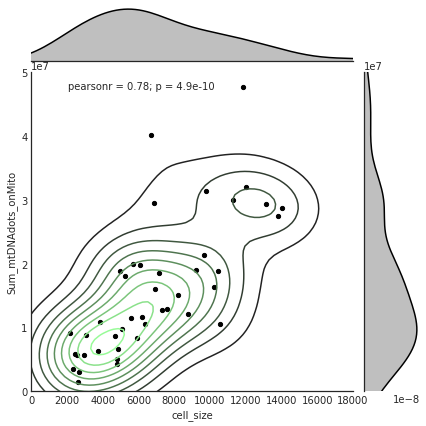

In [56]:
# Specify data

x = cell_size_vs_dotssumInt['Ctrl_AK_Analysis']['cell_size']
y = cell_size_vs_dotssumInt['Ctrl_AK_Analysis']['Sum_mtDNAdots_onMito']
data1 = cell_size_vs_dotssumInt['Ctrl_AK_Analysis']

with sns.axes_style('white'):
    pal = sns.dark_palette("palegreen", as_cmap=True)
    sns.jointplot(x, y, data1, kind='kde', shade=False, cmap=pal, color='k', xlim=(0, 1.8e4), ylim=(0, 5e7)).plot_joint(plt.scatter, s=18, color='k')
    
#     , xlim=(-1.e3, 1e8), ylim=(-0.2e8, 1e8)


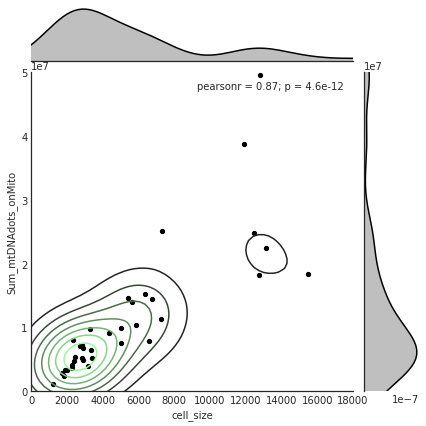

In [57]:
# Specify data

x = cell_size_vs_dotssumInt['GUK1_R_Analysis']['cell_size']
y = cell_size_vs_dotssumInt['GUK1_R_Analysis']['Sum_mtDNAdots_onMito']
data2 = cell_size_vs_dotssumInt['GUK1_R_Analysis']

with sns.axes_style('white'):
    pal = sns.dark_palette("palegreen", as_cmap=True)
    sns.jointplot(x, y, data2, kind='kde', shade=False, cmap=pal, color='k', xlim=(0, 1.8e4), ylim=(0, 5e7)).plot_joint(plt.scatter, s=18, color='k')
    
# ,xlim=(0, 1.8e4), ylim=(0, 5e7)

In [ ]:
len(dots_int['GUK1_D_Analysis'])

In [ ]:
# noticed very small (erroneous) cell_size via manual inspection of values, fixed in Ctrl_AK cell_42 which had 2 entries for cell_size
dots_metrics['Ctrl_AK_Analysis'] = dots_metrics['Ctrl_AK_Analysis'][dots_metrics['Ctrl_AK_Analysis']['cell_size'] > 500]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

for i in range(len(axes)):
    axes[i].set_xlim([0,18000])
    axes[i].set_ylim([0,5e7])

dots_metrics['Ctrl_AK_Analysis'].plot.scatter('cell_size', 'mtDNAdots_onMito', ax=axes[0])
dots_metrics['GUK1_D_Analysis'].plot.scatter('cell_size', 'mtDNAdots_onMito', ax=axes[1])
# dots_metrics['GUK1_D_Analysis']

In [ ]:
a = Ctrl_AK_df.drop_duplicates(subset = "Population")

In [ ]:
len(Ctrl_AK_df[Ctrl_AK_df['Population'] == 'mtDNA_dots'])


In [ ]:
# Select only Cell_Surface Cell:

cell_size = Ctrl_AK_df.loc[Ctrl_AK_df['Population'] == '01_Cell_surface', ['Surface Area (µm²)']]
mito_int = Ctrl_AK_df.loc[Ctrl_AK_df['Population'] == 'Mito_mask_decon', ['Sum (561 (DCI: 60 its, MTR 1.49))', 'Volume (µm³)']]

In [ ]:
mito_int.plot.scatter('Sum (561 (DCI: 60 its, MTR 1.49))', 'Volume (µm³)', logx=True, logy=True)